### **What is BERT?**
- **Bidirectional NLP Model**: BERT processes text in both forward and backward directions simultaneously, allowing it to understand context better than unidirectional models.
- **Pre-Training Tasks**:
  1. **Masked Language Modeling (MLM)**: Predicts missing words in a sentence, teaching the model context awareness.
  2. **Next Sentence Prediction (NSP)**: Predicts whether two sentences are sequential, enabling tasks like question-answering and summarization.
- **OpenAI GPT vs. BERT**: While GPT generates text by predicting the next word in a sequence, BERT is designed to understand existing text better by leveraging bidirectional context.

---

### **Architecture Overview**
- **Transformer Encoder**: Uses the encoder part of the Transformer architecture.
- **Key Features**:
  - **Self-Attention Mechanism**: Assigns importance weights to all words in a sequence.
  - **WordPiece Tokenization**: Breaks words into subwords, enabling better handling of rare or out-of-vocabulary words.

---

### **Strengths of BERT**
1. **Contextual Understanding**:
   - Unlike older models (e.g., Word2Vec, GloVe), which create static embeddings, BERT generates dynamic embeddings that change based on the context.
2. **Versatility**:
   - Pre-trained on a massive corpus, it can be fine-tuned for various tasks with minimal data (e.g., classification, summarization, Q&A).
3. **Transfer Learning**:
   - BERT's pre-trained model serves as a strong starting point for domain-specific tasks like healthcare or legal text analysis.

---

### **Drawbacks of BERT**
1. **Resource-Intensive**:
   - Requires significant computational resources for training and fine-tuning.
   - Inferencing is slower compared to lightweight models like DistilBERT.
2. **Short Input Limit**:
   - Can only process sequences up to 512 tokens. Longer texts need chunking, which can dilute context.
3. **Overfitting**:
   - Fine-tuning on small datasets can lead to overfitting if regularization techniques are not applied.

---

### **When to Use BERT**
1. **Text Classification**:
   - Spam detection, sentiment analysis, or topic categorization.
2. **Question-Answering**:
   - Answering queries based on a passage, such as FAQ chatbots.
3. **Named Entity Recognition (NER)**:
   - Extracting entities like names, dates, and locations from text.
4. **Summarization**:
   - Generating concise summaries of articles or medical reports.
5. **Translation**:
   - Though not designed for machine translation, BERT-like models are often fine-tuned for it.

---

### **Real-World Applications**
1. **Healthcare**:
   - Extracting critical information from electronic health records.
   - Diagnosing conditions using medical literature.
   - Example: Fine-tuning BERT with clinical datasets like MIMIC-III.
2. **Search Engines**:
   - Google Search uses BERT to understand the intent behind user queries.
   - Example: A query like "What is the fastest route to a nearby pharmacy?" considers both context and relevance.
3. **Legal Domain**:
   - Analyzing and summarizing legal documents.
   - Identifying clauses, contracts, and obligations.
4. **Customer Support**:
   - Automating FAQs and providing accurate responses in chatbots.

---

### **Advancements Based on BERT**
1. **DistilBERT**:
   - A lightweight version of BERT with reduced size and faster inference.
2. **RoBERTa**:
   - Enhanced training methods like removing NSP and using larger batch sizes.
3. **ALBERT**:
   - Compresses BERT using parameter-sharing techniques, improving efficiency.
4. **Domain-Specific Variants**:
   - **BioBERT**: Optimized for medical texts.
   - **SciBERT**: Specialized for scientific literature.
   - **LegalBERT**: Focused on legal documentation.

---

### **Best Practices for Using BERT**
1. **Fine-Tuning**:
   - Always pre-process data to match BERT’s tokenization scheme.
   - Use smaller learning rates during fine-tuning to avoid catastrophic forgetting.
2. **Handling Long Texts**:
   - For sequences longer than 512 tokens, use sliding windows or summarization to shorten input.
3. **Regularization**:
   - Use dropout layers and techniques like early stopping to prevent overfitting.

---

## Classify spam vs no spam emails

In [21]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('spam.csv')
df.head()

In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

now we can see we have a imbalance in dataset.

In [6]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
747/4825

0.15481865284974095

In [9]:
df_spam = df[df['Category'] == 'spam']
df_spam.shape

(747, 2)

In [10]:
df_ham = df[df['Category'] == 'ham']
df_ham.shape

(4825, 2)

In [14]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [15]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape

(1494, 2)

In [16]:
df_balanced['Category'].value_counts()

Category
ham     747
spam    747
Name: count, dtype: int64

In [19]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(10)

,Category,Message,spam
3426,ham,True. Its easier with her here.,0
3885,spam,A link to your picture has been sent. You can ...,1
4377,spam,"If you don't, your prize will go to another cu...",1
3192,spam,UR awarded a City Break and could WIN a £200 S...,1
2352,spam,Download as many ringtones as u like no restri...,1
4965,spam,Dear Voucher holder Have your next meal on us....,1
611,spam,22 days to kick off! For Euro2004 U will be ke...,1
4249,spam,"accordingly. I repeat, just text the word ok o...",1
2032,ham,"I noe la... U wana pei bf oso rite... K lor, o...",0
1781,spam,BIG BROTHER ALERT! The computer has selected u...,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify=df_balanced['spam'])

In [23]:
X_train.head(10)

5456    For the most sparkling shopping breaks from 45...
5537    Want explicit SEX in 30 secs? Ring 02073162414...
2575    Your next amazing xxx PICSFREE1 video will be ...
1072    URGENT! We are trying to contact U. Todays dra...
2620    <Forwarded from 21870000>Hi - this is your Mai...
5529                            What about this one then.
3442    Get a FREE mobile video player FREE movie. To ...
745       Men like shorter ladies. Gaze up into his eyes.
2420    SMS SERVICES For your inclusive text credits p...
3725    Hi there, 2nights ur lucky night! Uve been inv...
Name: Message, dtype: object

**importing BERT model and get embeding vectors for few sample statements**

In [26]:
bert_preprocess =  hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder =  hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [30]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up!",
    "Ali, are you up for a football game tomorrow?"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.799545  , -0.41840777, -0.80555636, ..., -0.59523046,
        -0.7051719 ,  0.88296854],
       [-0.90907633, -0.5276207 , -0.94845015, ..., -0.88698876,
        -0.7406729 ,  0.8881076 ]], dtype=float32)>

In [31]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
])

In [34]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606917 , -0.14219394,  0.4960459 , ...,  0.42165306,
        -0.5322142 ,  0.80312175],
       [-0.8602322 , -0.21242936,  0.49156928, ...,  0.39798063,
        -0.60506284,  0.8447163 ],
       [-0.7128859 , -0.15463904,  0.38401678, ...,  0.35278738,
        -0.50991327,  0.7347408 ],
       [-0.82533467, -0.35550585, -0.590697  , ..., -0.016137  ,
        -0.6141757 ,  0.872303  ],
       [-0.75041336, -0.2681263 , -0.26689744, ...,  0.02839341,
        -0.59381   ,  0.79749876],
       [-0.7854437 , -0.29949695,  0.4102739 , ...,  0.5222542 ,
        -0.4957355 ,  0.815075  ]], dtype=float32)>

**Cosine Similarity**

Cosine similarity is a metric used to measure the similarity between two non-zero vectors of an inner product space. It calculates the cosine of the angle between the vectors. 

**Key Points:**

* **Range:** The cosine similarity ranges from -1 to 1. 
    - 1: Perfect similarity
    - -1: Perfect dissimilarity
    - 0: Orthogonal (no similarity)
* **Applications:**
    - Document similarity
    - Recommendation systems
    - Natural language processing
    - Image and video analysis

**Calculation:**

Given two vectors, A and B, the cosine similarity is calculated as:

```
Cosine Similarity(A, B) = (A · B) / (||A|| ||B||)
```

where:
- `A · B` is the dot product of A and B.
- `||A||` and `||B||` are the magnitudes (norms) of A and B, respectively.

**Interpretation:**

A higher cosine similarity value indicates that the two vectors are more similar in direction, regardless of their magnitude. 

**Example:**

Consider two documents:

* Document A: "The quick brown fox jumps over the lazy dog"
* Document B: "The lazy dog is jumped over by the quick brown fox"

By converting these documents into numerical representations (e.g., using TF-IDF), we can calculate their cosine similarity. If the documents are highly similar, the cosine similarity will be close to 1.


In [33]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

Values near to 1 means they are similar. 0 means they are very different. Above you can use comparing "banana" vs "grapes" you get 0.99 similarity as they both are fruits

In [35]:
cosine_similarity([e[0]],[e[3]])

array([[0.8470383]], dtype=float32)

In [36]:
cosine_similarity([e[3]],[e[4]])

array([[0.98720354]], dtype=float32)

Jeff bezos and Elon musk are more similar then Jeff bezos and banana as indicated above

**Building Models**

There are two types of models you can build in tensorflow.

(1) Sequential (2) Functional

In [44]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [47]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [48]:
len(X_train)

1120

In [49]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [50]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 310s 8s/step - loss: 0.6233 - accuracy: 0.6652 - precision: 0.6649 - recall: 0.6661
Epoch 2/10
35/35 [==============================] - 266s 8s/step - loss: 0.5017 - accuracy: 0.8232 - precision: 0.8164 - recall: 0.8339
Epoch 3/10
35/35 [==============================] - 256s 7s/step - loss: 0.4334 - accuracy: 0.8473 - precision: 0.8302 - recall: 0.8732
Epoch 4/10
35/35 [==============================] - 265s 8s/step - loss: 0.3830 - accuracy: 0.8830 - precision: 0.8629 - recall: 0.9107
Epoch 5/10
35/35 [==============================] - 254s 7s/step - loss: 0.3494 - accuracy: 0.8911 - precision: 0.8763 - recall: 0.9107
Epoch 6/10
35/35 [==============================] - 263s 8s/step - loss: 0.3268 - accuracy: 0.8991 - precision: 0.8873 - recall: 0.9143
Epoch 7/10
35/35 [==============================] - 259s 7s/step - loss: 0.3152 - accuracy: 0.8884 - precision: 0.8769 - recall: 0.9036
Epoch 8/10
35/35 [==============================

In [51]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 92s 7s/step - loss: 0.2928 - accuracy: 0.8984 - precision: 0.8565 - recall: 0.9572


[0.2927825152873993,
 0.8983957171440125,
 0.8564593195915222,
 0.9572192430496216]

In [52]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 89s 7s/step


In [53]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[157,  30],
       [  8, 179]], dtype=int64)

In [56]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


Text(50.722222222222214, 0.5, 'Truth')

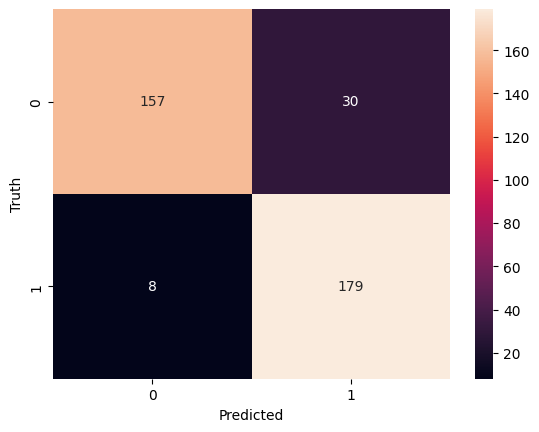

In [57]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       187
           1       0.86      0.96      0.90       187

    accuracy                           0.90       374
   macro avg       0.90      0.90      0.90       374
weighted avg       0.90      0.90      0.90       374



**Checking Inference**

In [59]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 3s 3s/step


array([[0.8218657 ],
       [0.9012458 ],
       [0.8588477 ],
       [0.30627203],
       [0.18979858]], dtype=float32)